# 06 Example - Continuous Scan

In [8]:
%load_ext autoreload
%autoreload 2

import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup devices

In [9]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()

## Define a measure function

In [17]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices and adds a random component. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage
    d.v2_readout = [devices.v2.voltage, devices.v2.voltage]

    # d.vsum = d.v1_readout + d.v2_readout
    
    return d

## Experiments

### 1. 1D Scan with scan0 as ContinuousScan, using point data

In [24]:
def measure_up_to_3D(expt):
    d = ps.ItemAttribute()

    d.x1 = expt.runinfo.scan0.i
    d.x2 = [d.x1 for _ in range(2)]
    d.x3 = [[expt.runinfo.scan0.i, expt.runinfo.scan0.i] for _ in range(2)]

    return d


In [44]:
expt = ps.Experiment(runinfo, devices)
expt.check_runinfo()

runinfo = ps.RunInfo()
runinfo.measure_function = measure_up_to_3D
runinfo.scan0 = ps.ContinuousScan(10)


data = expt.runinfo.measure_function(expt)
expt.runinfo.scans[-1].iterate(expt, 0, -1)
expt.preallocate(data)
expt.save_point(data)

expt.runinfo.scans[-1].iterate(expt, 1, 1)
data = expt.runinfo.measure_function(expt)
expt.reallocate(data)
expt.save_point(data)


(2, 2)
(2, 2, 2)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [38]:
expt.x2.shape

(1, 4)

In [18]:
# Set up the runinfo with scan0 as RepeatScan
runinfo = ps.RunInfo()

# Setting n_max ends the experiment after that number of iterations. To run continuously omit this parameter.
runinfo.scan0 = ps.ContinuousScan(n_max=100, dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.run()

<function get_voltage_data at 0x10ece3ec0>


IndexError: index 1 is out of bounds for axis 0 with size 1

In [15]:
# implementing expt kill switch that can be called using ctrl+c to stop the expt
try:
    # 1D Plot using point data
    ps.live_plot1D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()

Stopping Experiment


### 2. 2D Scan with scan1 as ContinuousScan, using point data

In [6]:
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage')
runinfo.scan2 = ps.ContinuousScan(20)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.run()

expt.v1_voltage.shape

AssertionError: Scan indicies are not sequential

In [7]:
try:
    ps.live_plot2D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()


AttributeError: 'RunInfo' object has no attribute 'running'

In [ ]:
expt.v1_readout.shape

: 

: 

### 3. 2D Scan with scan0 as RepeatScan, scan1 as ContinuousScan, using point Data

In [ ]:
%load_ext autoreload
%autoreload 2

runinfo = ps.RunInfo()
runinfo.scan0 = ps.RepeatScan(10, dt=0.005)
runinfo.scan1 = ps.ContinuousScan(n_max=50, dt=0.001)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<function get_voltage_data at 0x11f6de980>


TypeError: Dimensions of C (42, 10) should be one smaller than X(10) and Y(43) while using shading='flat' see help(pcolormesh)

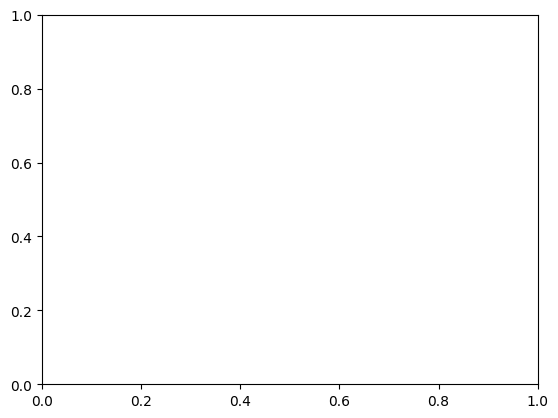

In [ ]:
try:
    ps.live_plot2D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()